In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline

plt.style.use('ggplot')

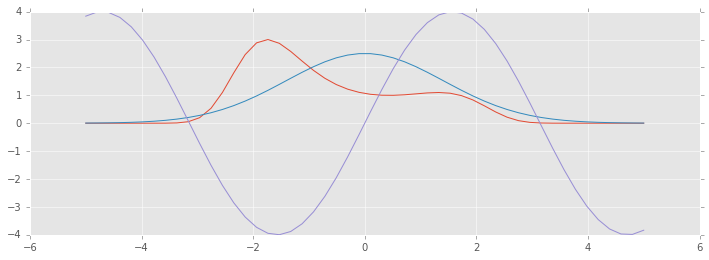

In [56]:
def P_star(x):
    return np.exp(0.4*(x-0.4)**2-0.08*x**4)

def Q_star(x):
    return 2.5*np.exp(-x**2/4.0)

def phi(x):
    return 4*np.sin(x)

x = np.linspace(-5, 5)


plt.figure(figsize=(12,4))
plt.plot(x, P_star(x))
plt.plot(x, Q_star(x))
plt.plot(x, phi(x))

The expectation value of phi in the probability density, $P(x)$ is about -1.3186311907073391.

In [60]:
prec = -1.3186311907073391

Q sampler. 

In [34]:
max = P_star(-1.75233)
def Q_samples(N):
    sample = []
    steps = (5.0-(-5.0))/N
    x = np.random.uniform(-5,5,N)
    for i in range(N):
        if np.random.uniform(0,max)< Q_star(x[i]):
            sample = sample +[x[i]]
    return len(sample), sample

In [43]:
def weight(N):
    n,s = Q_samples(N)
    w = np.zeros(n)
    for i in range(n):
        w[i] = P_star(s[i])/Q_star(s[i])
    return w

In [44]:
len(weight(N))

293

In [57]:
# expectation value

N=1000

def expectation_value(N):
    n,s = Q_samples(N)
    w = np.zeros(n)
    for i in range(n):
        w[i] = P_star(s[i])/Q_star(s[i])
    
    return sum(phi(s)*w)/sum(w)

In [58]:
expectation_value(100000)

-1.2879605902572107

In [63]:
err = prec - (-1.2879605902572107)
err

-0.030670600450128482

In [69]:
2**(17)

131072

In [78]:
exp_List = []
for i in range(3,18):
    exp_List = exp_List + [expectation_value(2**i)]

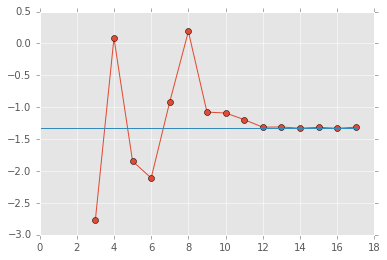

In [95]:
plt.plot(range(3,18),exp_List,'o-')
plt.plot(range(18),prec*np.ones(18))

it becomes very good near N = 4000 

In [90]:
range(3,18)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

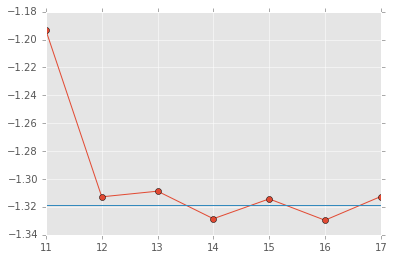

In [94]:
plt.plot(range(11,18),exp_List[8:], 'o-')
plt.plot(range(11,18),prec*np.ones(7))

n random sample in (0, 1)

In [102]:

n = 1000000
u = np.random.uniform(0, 1, n)


histogram of the uniform random sample 

[0, 1.0, 0, 1.5]

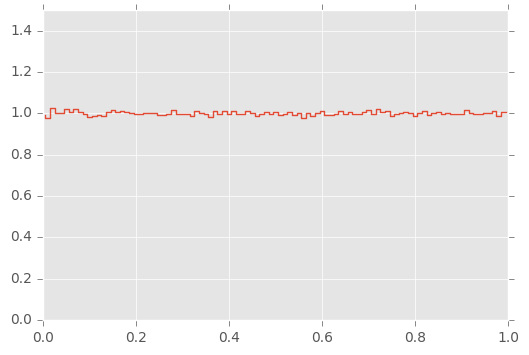

In [105]:
factor = 1.0
hist, bin_edges = np.histogram(u, bins=100, normed=True)


bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

bin_width= bin_edges[1]-bin_edges[0]



plt.step(bin_centers, factor*hist, linewidth=1)

plt.axis([0,1.,0,1.5])

In [108]:
sum(bin_centers**2*hist)*bin_width

0.33335986173968329

To make a histogram like y = x, find an inverse of $y =\int x ~dx =x^2/2$.

It is $\sqrt{2x}$, and the histogram reaches $(\sqrt{2}, \sqrt{2})$

In [8]:

factor = 1.0
hist0, bin_edges0 = np.histogram((2*u)**(1/2.0), bins=100, normed=True)

[0, 1.5, 0, 1.5]

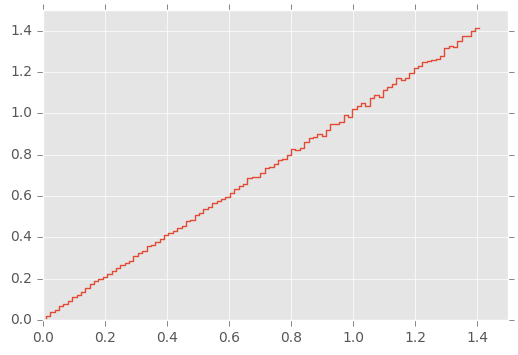

In [10]:
bin_centers0 = (bin_edges0[:-1] + bin_edges0[1:]) / 2.

bin_width0= bin_edges0[1]-bin_edges0[0]



plt.step(bin_centers0, factor*hist0, linewidth=1)

plt.axis([0,1.5,0,1.5])

Using this, it is able to integrate some function. Sometimes more effectively.

For example, $\int x^2~dx = \int x(x dx) \equiv \int x~dt$, where $dt = x dx$.

This $dt$ can be given by the above histogram.  

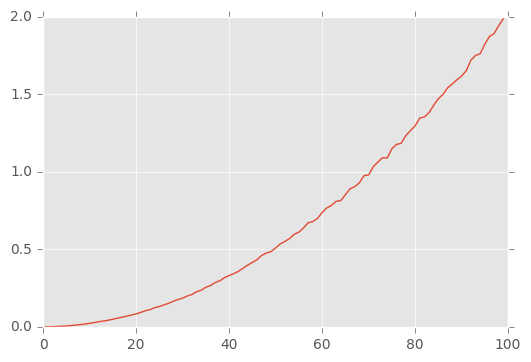

In [11]:
plt.plot(bin_centers0*hist0)

In [15]:
sum(bin_centers0*hist0)*bin_width0

0.94226418036178727

This value is a good approximation for $\int^{\sqrt{2}}_0 x^2 ~dx \sim 0.942809$.

In [16]:
sum(bin_centers0**2*hist0)*bin_width0

0.99920197964109225

This value is a good approximation for $\int^{\sqrt{2}}_0 x^2 ~dx = 1$

These two are very good approximations since $dt ~ x~dx$ have good importances for $x^2$ and $x^3$.  

In [86]:
def error(n):
    u = np.random.uniform(0, 1, n)
    factor = 1.0
    hist, bin_edges = np.histogram((2*u)**(1/2.0), bins=100, normed=True)


    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

    bin_width= bin_edges[1]-bin_edges[0]



    err = sum(bin_centers*hist)*bin_width- 0.9428090415820634
    
    return err

def plot_err(N):
    X = range(5,N,N/100)
    Y = []
    for i in range(len(X)):
        Y=Y+[error(X[i])]
    plt.plot(X,Y)
    

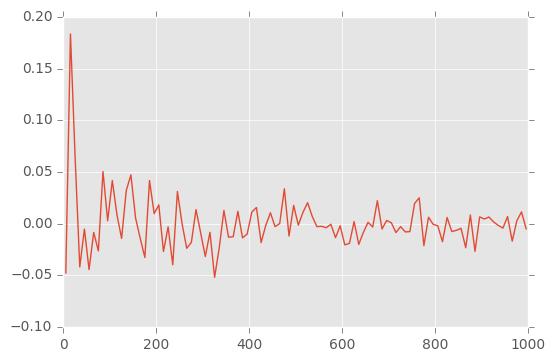

In [129]:
plot_err(1000)

In [109]:
def error0(n):
    u = np.random.uniform(0, 1, n)
    factor = 1.0
    hist, bin_edges = np.histogram(u, bins=100, normed=True)


    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

    bin_width= bin_edges[1]-bin_edges[0]



    err = sum(bin_centers**2*hist)*bin_width- 1/3.0
    
    return err

def plot_err0(N):
    X = range(5,N,N/100)
    Y = []
    for i in range(len(X)):
        Y=Y+[error0(X[i])]
    plt.plot(X,Y)
    

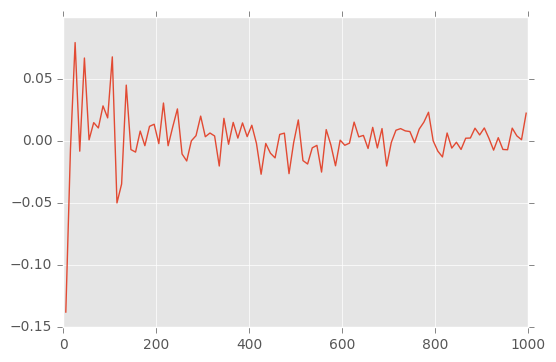

In [128]:
plot_err0(1000)

In [132]:
def plot_gap(N):
    X = range(5,N,N/1000)
    Y = []
    for i in range(len(X)):
        Y=Y+[error(X[i])-error0(X[i])]  
    plt.plot(X,Y)
    

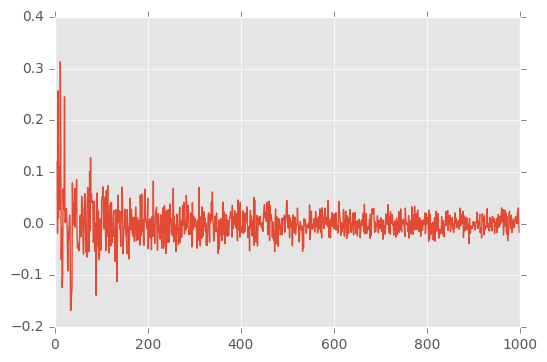

In [133]:
plot_gap(1000)